In [31]:
%matplotlib inline

from sklearn import datasets
from sklearn import preprocessing

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

#Read in the Iris File
df = pd.read_csv('Iris.csv')

#Show the mathematical details of the data set
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [14]:
#Checking for differences in data
#df['PetalWidthCm'].plot.hist()
#plt.show()

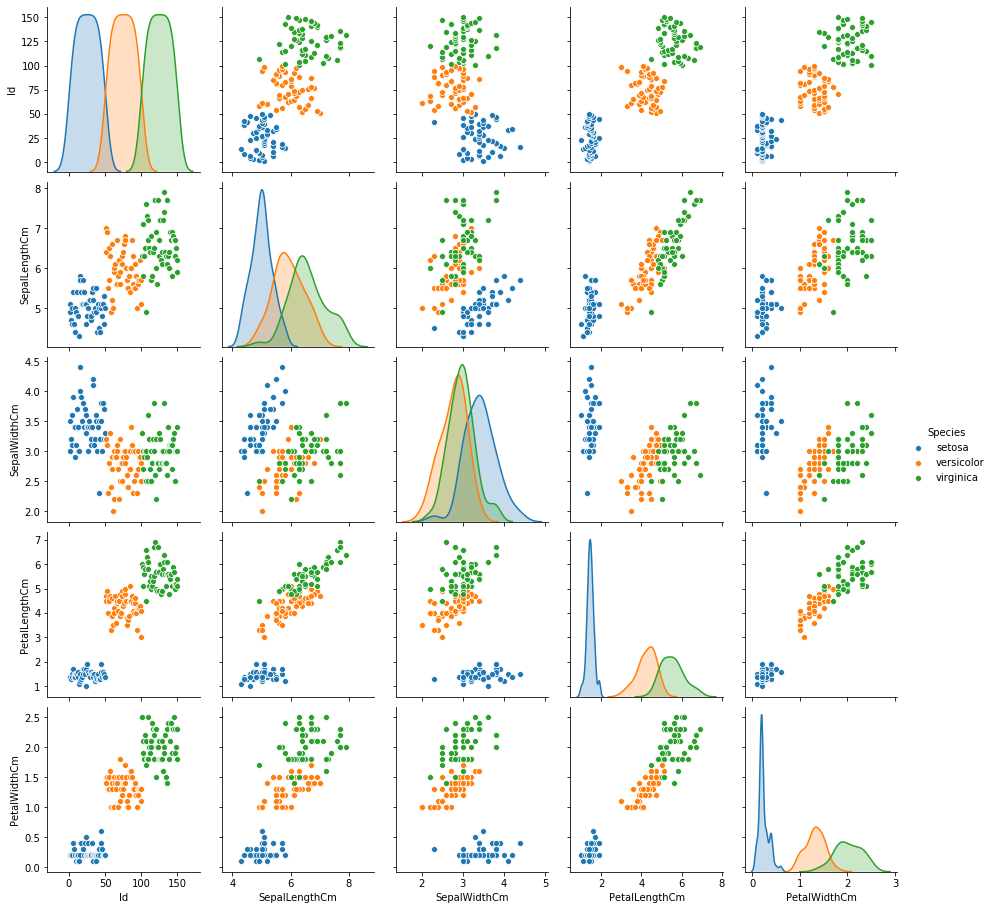

In [15]:
#Plot the Entire Data For an Easy Visualization
sns.pairplot(df, hue='Species')

In [16]:
#
# Decision Tree
#

# Definite input and classes for the data
all_inputs = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
all_classes = df['Species'].values

# split the inputs and classes to training parts and testing parts
(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.7, random_state=1)

# Use the installed Decision Tree to fit and score the data
dtc = DecisionTreeClassifier()
dtc.fit(train_inputs, train_classes)
dtc.score(test_inputs, test_classes)

0.9555555555555556

In [17]:
#Load the Iris data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

irisdata = pd.read_csv(url, names=names)


#
# Backpropagation
#

#Create the dataset
X = irisdata.iloc[:, 0:4]
y = irisdata.select_dtypes(include=[object])

le = preprocessing.LabelEncoder()
y = y.apply(le.fit_transform)

In [18]:
#Split the Data Once Again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

#Train the Data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())

#Compare out predictions to the actual data
predictions = mlp.predict(X_test)

#Display the Data
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 7  0  0]
 [ 0  6  0]
 [ 0  1 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.86      1.00      0.92         6
           2       1.00      0.94      0.97        17

    accuracy                           0.97        30
   macro avg       0.95      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



In [19]:
dataset = pd.read_csv(url, names=names)

#
# K-nearest Neighbors
#

#Create the dataset
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

#Prepare to train the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Train the dataset
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

#Compare our predictions to the test dataset
y_pred = classifier.predict(X_test)

#Desplay the Data
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0 11  2]
 [ 0  0  5]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.71      1.00      0.83         5

       accuracy                           0.93        30
      macro avg       0.90      0.95      0.92        30
   weighted avg       0.95      0.93      0.94        30



Text(0.5, 1.0, "Model's classification")

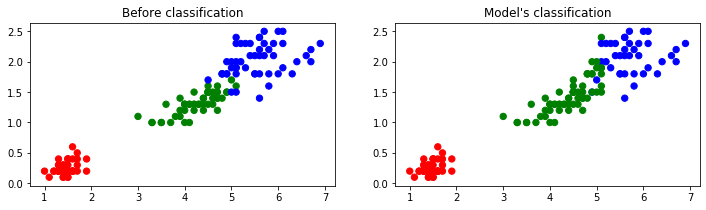

In [20]:
#
# K-Means Clustering
#

iris = datasets.load_iris()

x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

model = KMeans(n_clusters=3)
model.fit(x)

# Create a plot figure of size 12 x 3 which differenciates between the flower types
plt.figure(figsize=(12,3))
colors = np.array(['red', 'green', 'blue'])

# Fudge to Reorder the Cluster
predictedY = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)

# Graph the original classification for Petal Length and Petal Width
plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']], s=40)
plt.title('Before classification')
 
# Graph the K Means Classification
plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY], s=40)
plt.title("Model's classification")

In [39]:
from sklearn.preprocessing import scale

digits = datasets.load_digits()
data = scale(digits.data)

### BONUS PART FOR ANALYZING DIGITS DATASET WITH THE SUPERVISED LEARNING ALGORITHMS

# split the inputs and classes to training parts and testing parts
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(data, digits.target, digits.images, test_size = 0.25, random_state = 42)

# DTC
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

predicted = dtc.predict(X_test)

#Desplay  Decision Tree's Data
print("Decision Tree")
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))
print()


#KNN
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

#Desplay K-Nearest's Data
print("K Nearest Neighbors")
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))
print()






Decision Tree
[[39  0  0  0  3  1  0  0  0  0]
 [ 0 34  1  1  0  0  0  0  1  0]
 [ 0  0 31  2  0  1  0  1  3  0]
 [ 0  0  0 39  1  1  0  1  4  0]
 [ 1  2  0  0 46  0  1  4  0  1]
 [ 0  1  2  1  1 51  2  0  1  0]
 [ 0  0  0  0  0  1 42  0  0  2]
 [ 0  0  0  2  2  0  0 37  0  0]
 [ 1  5  2  2  1  0  0  1 24  2]
 [ 0  0  0  2  0  1  0  0  1 44]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.81      0.92      0.86        37
           2       0.86      0.82      0.84        38
           3       0.80      0.85      0.82        46
           4       0.85      0.84      0.84        55
           5       0.91      0.86      0.89        59
           6       0.93      0.93      0.93        45
           7       0.84      0.90      0.87        41
           8       0.71      0.63      0.67        38
           9       0.90      0.92      0.91        48

    accuracy                           0.86       450
   ma